In [1]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# #data splitting and making class dirs
# output_base = "dataset-v2/dataset_classified_split"
# label_dir = 'dataset-v2/kaggle-good/archive/'
# image_dir = 'dataset-v2/kaggle-good/archive/'

# # Gather (image, class_id) pairs
# samples = []
# for img_name in os.listdir(image_dir):
#     if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
#         continue
#     label_name = os.path.splitext(img_name)[0] + ".txt"
#     label_path = os.path.join(label_dir, label_name)
#     img_path = os.path.join(image_dir, img_name)
#     if not os.path.exists(label_path):
#         continue
#     with open(label_path, "r") as f:
#         first_line = f.readline().strip()
#         if not first_line:
#             continue
#         class_id = first_line.split()[0]
#     samples.append((img_path, class_id))

# # Stratified split
# img_paths, class_ids = zip(*samples)
# train_imgs, test_imgs, train_labels, test_labels = train_test_split(
#     img_paths, class_ids, test_size=0.2, stratify=class_ids, random_state=42
# )
# train_imgs, val_imgs, train_labels, val_labels = train_test_split(
#     train_imgs, train_labels, test_size=0.2, stratify=train_labels, random_state=42
# )

# splits = [
#     ("train", train_imgs, train_labels),
#     ("val", val_imgs, val_labels),
#     ("test", test_imgs, test_labels),
# ]

# # Copy images into split/class folders
# for split_name, imgs, labels in splits:
#     for img_path, class_id in zip(imgs, labels):
#         split_dir = os.path.join(output_base, split_name, class_id)
#         os.makedirs(split_dir, exist_ok=True)
#         shutil.copy(img_path, os.path.join(split_dir, os.path.basename(img_path)))

In [2]:
# from collections import Counter

# print("Final Split Distribution:")
# for name, labels in [("Train", train_labels), ("Val", val_labels), ("Test", test_labels)]:
#     counts = Counter(labels)
#     print(f"{name}: {dict(counts)}")

In [ ]:
# import tensorflow as tf
# from tensorflow import keras

# IMG_SIZE = (224, 224)
# BATCH_SIZE = 32

# #1.1 Data augmentation pipeline
# data_augmentation = keras.Sequential([
#     keras.layers.RandomFlip("horizontal"),
#     keras.layers.RandomRotation(0.1),
#     keras.layers.RandomZoom(0.1),
#     keras.layers.RandomBrightness(0.1),
#     keras.layers.RandomContrast(0.1)
# ])

# # Normalization layer
# normalization_layer = keras.layers.Rescaling(1./255)

# #1.2 load data
# train_ds = keras.utils.image_dataset_from_directory(
#     "dataset-v2/dataset_classified_split/train",
#     image_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     shuffle=True,
#     color_mode="rgb"
# )
# val_ds = keras.utils.image_dataset_from_directory(
#     "dataset-v2/dataset_classified_split/val",
#     image_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     shuffle=False,
#     color_mode="rgb"
# )
# test_ds = keras.utils.image_dataset_from_directory(
#     "dataset-v2/dataset_classified_split/test",
#     image_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     shuffle=False,
#     color_mode="rgb"
# )

# # Apply augmentation and normalization
# train_ds = train_ds.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
# val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
# test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Found 780 files belonging to 3 classes.
Found 196 files belonging to 3 classes.
Found 245 files belonging to 3 classes.


In [ ]:
# # Compute class weights for imbalanced data
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Get unique class ids and their counts from your training labels
# unique_classes = np.unique(train_labels)
# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=unique_classes,
#     y=train_labels
# )
# class_weight_dict = {int(cls): weight for cls, weight in zip(unique_classes, class_weights)}
# print("Class weights:", class_weight_dict)

NameError: name 'train_labels' is not defined

In [ ]:
# # # Build and train ResNet50 classifier with class weights and fine-tuning
# # from tensorflow.keras import layers
# # from tensorflow import keras

# # Model definition
# def build_resnet_classifier(input_shape=IMG_SIZE + (3,), num_classes=3):
#     base_model = keras.applications.ResNet50(
#         include_top=False,
#         weights="imagenet",
#         input_shape=input_shape,
#         pooling="avg"
#     )
#     base_model.trainable = False  # Fine-tune later if needed

#     inputs = keras.Input(shape=input_shape)
#     x = base_model(inputs, training=False)
#     x = layers.Dropout(0.3)(x)
#     x = layers.Dense(128, activation="relu")(x)
#     x = layers.Dropout(0.3)(x)
#     outputs = layers.Dense(num_classes, activation="softmax")(x)
#     model = keras.Model(inputs, outputs)
#     return model

# resnet_model = build_resnet_classifier()
# resnet_model.compile(
#     optimizer=keras.optimizers.Adam(),
#     loss="sparse_categorical_crossentropy",
#     metrics=["accuracy"]
# )
# resnet_model.summary()

# # Train with class weights
# epochs = 15
# history = resnet_model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=epochs,
#     class_weight=class_weight_dict
# )

# # # Fine-tuning (optional, for better accuracy)
# # # Unfreeze the base model and recompile with a lower learning rate
# # # resnet_model.layers[1].trainable = True  # Unfreeze base_model
# # # resnet_model.compile(
# # #     optimizer=keras.optimizers.Adam(1e-5),
# # #     loss="sparse_categorical_crossentropy",
# # #     metrics=["accuracy"]
# # # )
# # # history_finetune = resnet_model.fit(
# # #     train_ds,
# # #     validation_data=val_ds,
# # #     epochs=5,
# # #     class_weight=class_weight_dict
# # # )

In [ ]:

# --- TRAIN ---
EPOCHS = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict
)

# --- EVALUATE ---
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")


Found 780 files belonging to 3 classes.
Found 196 files belonging to 3 classes.
Found 245 files belonging to 3 classes.
Class weights: {0: np.float64(0.7650375939849624), 1: np.float64(0.8340163934426229), 2: np.float64(2.0248756218905473)}


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ input_layer_2[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 2048)   │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 2048)   │  2,099,968 │ reshape[0][0],    │
│ (MultiHeadAttentio… │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 1, 2048)   │      4,096 │ multi_head_atten… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2048)      │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 2048)      │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    262,272 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 3)         │        387 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 25,954,435 (99.01 MB)

 Trainable params: 6,832,387 (26.06 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4013 - loss: 1.2822 - val_accuracy: 0.4643 - val_loss: 0.9670 - learning_rate: 1.0000e-05
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5000 - loss: 1.0069 - val_accuracy: 0.5000 - val_loss: 0.8884 - learning_rate: 1.0000e-05
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5192 - loss: 0.9690 - val_accuracy: 0.5663 - val_loss: 0.8319 - learning_rate: 1.0000e-05
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5615 - loss: 0.8645 - val_accuracy: 0.5816 - val_loss: 0.7997 - learning_rate: 1.0000e-05
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5744 - loss: 0.8062 - val_accuracy: 0.5765 - val_loss: 0.7897 - learning_rate: 1.0000e-05
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6115 - loss: 0.8194 - val_accuracy: 0.5918 - val_loss: 0.7806 - learning_rate: 1.0000e-05
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6038 - loss:

In [6]:
# Unfreeze more layers (Stage 2)
for layer in resnet.layers[:-50]:  # previously :-10
    layer.trainable = False
for layer in resnet.layers[-50:]:
    layer.trainable = True

# Lower learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=5e-6),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Continue training
history_stage2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # smaller number since we're fine-tuning deeper layers
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.6000 - loss: 0.7939 - val_accuracy: 0.5765 - val_loss: 0.9130 - learning_rate: 5.0000e-06
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6944 - loss: 0.6327
Epoch 2: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.
25/25 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6641 - loss: 0.6775 - val_accuracy: 0.5969 - val_loss: 0.8743 - learning_rate: 5.0000e-06
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7064 - loss: 0.6353 - val_accuracy: 0.5867 - val_loss: 0.8442 - learning_rate: 2.5000e-06
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6705 - loss: 0.6323
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6846 - loss: 0.6297 - val_accuracy: 0.6020 - val_loss: 0.8089 - learning_rate: 2.5000e-06
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6987 - loss: 0.6209 - va

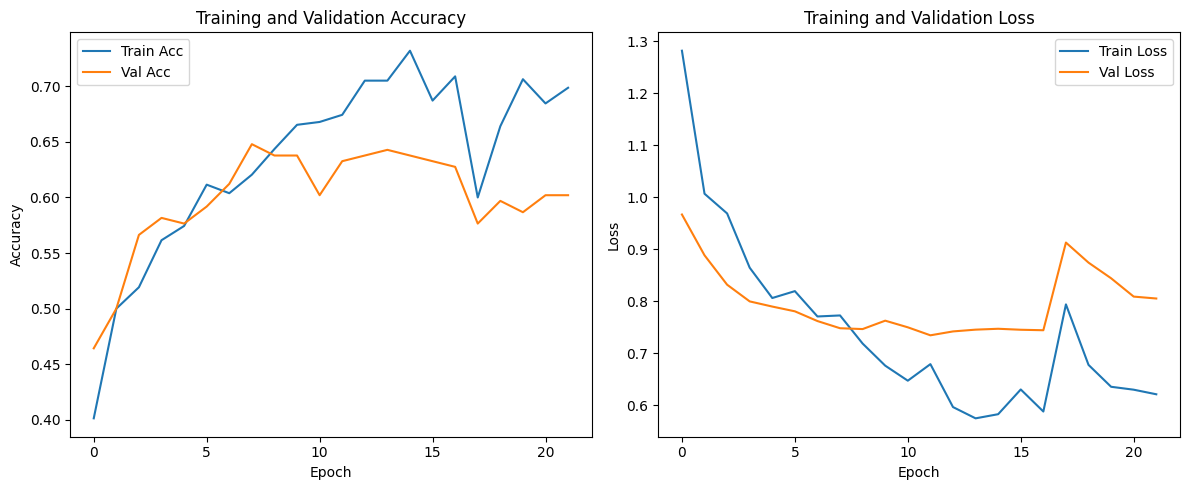

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 928ms/step - accuracy: 0.5878 - loss: 0.8366
Test accuracy: 0.5878, Test loss: 0.8366
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step 


<Figure size 600x600 with 0 Axes>

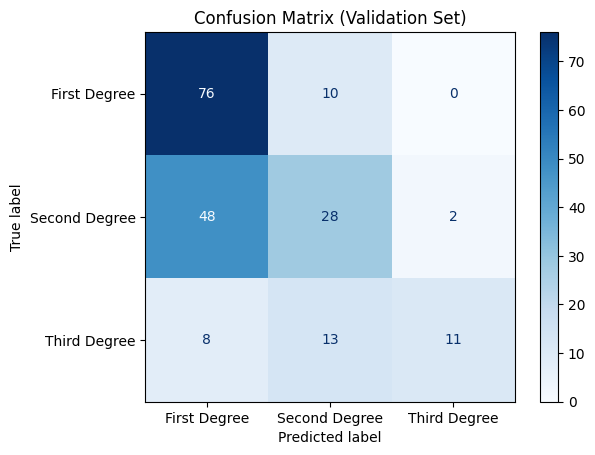

Validation Classification Report:
               precision    recall  f1-score   support

 First Degree       0.58      0.88      0.70        86
Second Degree       0.55      0.36      0.43        78
 Third Degree       0.85      0.34      0.49        32

     accuracy                           0.59       196
    macro avg       0.66      0.53      0.54       196
 weighted avg       0.61      0.59      0.56       196



In [8]:
# --- Model Evaluation and Visualization after Stage 2 ---
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1. Plot training history (loss and accuracy)
histories = [history, history_stage2] if 'history_stage2' in locals() else [history]
all_acc = np.concatenate([h.history['accuracy'] for h in histories])
all_val_acc = np.concatenate([h.history['val_accuracy'] for h in histories])
all_loss = np.concatenate([h.history['loss'] for h in histories])
all_val_loss = np.concatenate([h.history['val_loss'] for h in histories])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(all_acc, label='Train Acc')
plt.plot(all_val_acc, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(all_loss, label='Train Loss')
plt.plot(all_val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# 3. Confusion matrix for validation set
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_preds = np.argmax(model.predict(val_ds), axis=1)
cm = confusion_matrix(val_labels, val_preds)
class_names = ['First Degree', 'Second Degree', 'Third Degree']
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Validation Set)')
plt.show()

# 4. Classification report
print('Validation Classification Report:')
print(classification_report(val_labels, val_preds, target_names=class_names))

In [11]:
# Save Stage 2 weights
model.save_weights("checkpoints/hybrid_cnn_transformer/stage2.weights.h5")
print("Stage 2 weights saved!")

# Later, if you want to load them back:
# model.load_weights("checkpoints/hybrid_cnn_transformer/stage2.weights.h5")
# print("Stage 2 weights loaded!")

Stage 2 weights saved!


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from keras_cv.losses import FocalLoss

### Stage 3
# ------------------------------
# 1. Reload Stage 2 weights
# ------------------------------
model.load_weights("checkpoints/hybrid_cnn_transformer/stage2.weights.h5")
print("Loaded Stage 2 weights.")

# ------------------------------
# 2. Unfreeze ~50% of ResNet layers
# ------------------------------
base_model = None
for layer in model.layers:
    if isinstance(layer, tf.keras.Model) and 'resnet' in layer.name.lower():
        base_model = layer
        break

if base_model:
    total_layers = len(base_model.layers)
    unfreeze_from = total_layers // 2  # halfway point
    for layer in base_model.layers[unfreeze_from:]:
        layer.trainable = True
    for layer in base_model.layers[:unfreeze_from]:
        layer.trainable = False
    print(f"Unfroze {total_layers - unfreeze_from} layers out of {total_layers}")
else:
    print("⚠ Could not find ResNet base model. No layers unfrozen.")

# ------------------------------
# 3. Define focal loss
# ------------------------------
NUM_CLASSES = 3  # Update if different
focal_loss = FocalLoss(alpha=0.25, gamma=2.0, reduction="sum_over_batch_size")

# ------------------------------
# 4. Compile with low LR
# ------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6),
    loss=focal_loss,
    metrics=['accuracy']
)

# ------------------------------
# 5. Callbacks
# ------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)

# ------------------------------
# 6. One-hot encode labels for FocalLoss
# ------------------------------
def to_one_hot(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

train_ds_onehot = train_ds.map(to_one_hot, num_parallel_calls=tf.data.AUTOTUNE)
val_ds_onehot = val_ds.map(to_one_hot, num_parallel_calls=tf.data.AUTOTUNE)

# ------------------------------
# 7. Stronger Augmentation
# ------------------------------
def strong_augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    image = tf.image.random_hue(image, max_delta=0.1)
    return image, label

train_ds_aug = train_ds_onehot.map(strong_augment, num_parallel_calls=tf.data.AUTOTUNE)

# Cache & prefetch for speed
train_ds_aug = train_ds_aug.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds_onehot = val_ds_onehot.cache().prefetch(tf.data.AUTOTUNE)

# ------------------------------
# 8. Train Stage 3
# ------------------------------
history_stage3 = model.fit(
    train_ds_aug,
    validation_data=val_ds_onehot,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)

# ------------------------------
# 9. Save Stage 3 weights
# ------------------------------
model.save_weights("checkpoints/hybrid_cnn_transformer/stage3.weights.h5")
print("Stage 3 weights saved!")


Loaded Stage 2 weights.
Unfroze 88 layers out of 175
Epoch 1/10


c:\Users\ksan\Documents\thesis\automated-thermal-burn-severity-classifyer\.venv-training\lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 246 variables whereas the saved optimizer has 454 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


25/25 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6064 - loss: 0.2289 - val_accuracy: 0.5867 - val_loss: 0.2658 - learning_rate: 5.0000e-06
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6064 - loss: 0.2289 - val_accuracy: 0.5867 - val_loss: 0.2658 - learning_rate: 5.0000e-06
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6474 - loss: 0.1584 - val_accuracy: 0.5816 - val_loss: 0.2311 - learning_rate: 5.0000e-06
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6474 - loss: 0.1584 - val_accuracy: 0.5816 - val_loss: 0.2311 - learning_rate: 5.0000e-06
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7192 - loss: 0.1316 - val_accuracy: 0.5714 - val_loss: 0.2081 - learning_rate: 5.0000e-06
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7192 - loss: 0.1316 - val_accuracy: 0.5714 - val_loss: 0.2081 - learning_rate: 5.0000e-06
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7462 - loss: 0.1175 - v

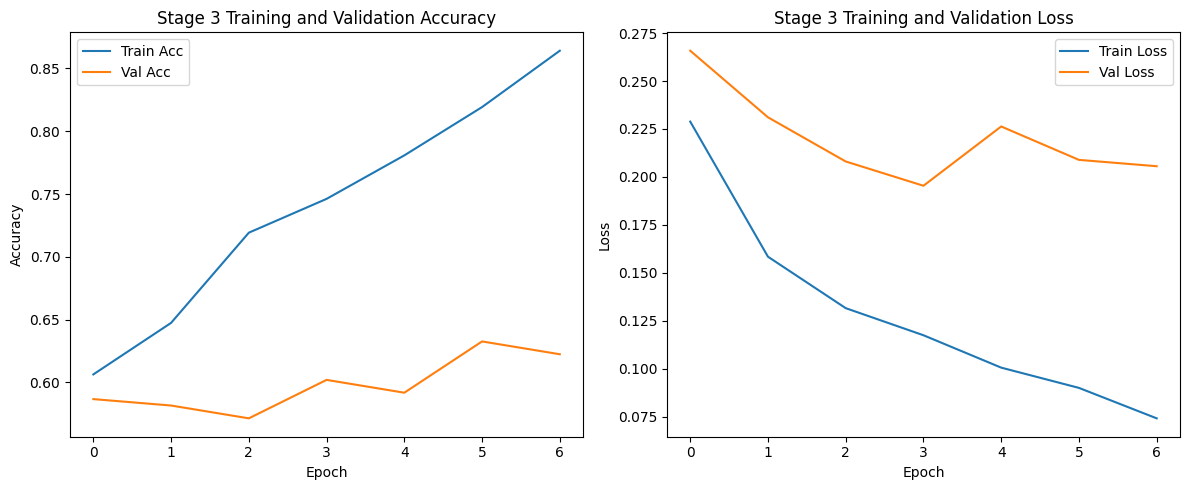

<Figure size 600x600 with 0 Axes>

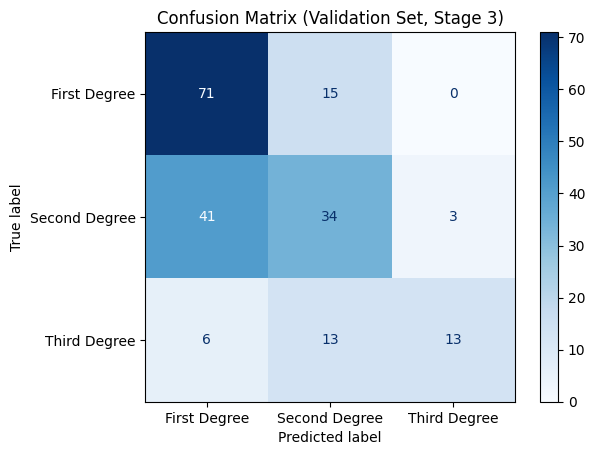

Validation Classification Report (Stage 3):
               precision    recall  f1-score   support

 First Degree       0.60      0.83      0.70        86
Second Degree       0.55      0.44      0.49        78
 Third Degree       0.81      0.41      0.54        32

     accuracy                           0.60       196
    macro avg       0.65      0.56      0.57       196
 weighted avg       0.61      0.60      0.59       196



In [19]:
# --- Stage 3 Model Performance Metrics ---
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1. Plot training history (loss and accuracy)
acc = history_stage3.history['accuracy']
val_acc = history_stage3.history['val_accuracy']
loss = history_stage3.history['loss']
val_loss = history_stage3.history['val_loss']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Stage 3 Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Stage 3 Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Confusion matrix and classification report on validation set
# Get true and predicted labels (convert one-hot to int)
val_labels = []
val_preds = []
for batch in val_ds_onehot:
    images, labels = batch
    preds = model.predict(images, verbose=0)
    val_labels.extend(np.argmax(labels.numpy(), axis=1))
    val_preds.extend(np.argmax(preds, axis=1))
val_labels = np.array(val_labels)
val_preds = np.array(val_preds)

class_names = ['First Degree', 'Second Degree', 'Third Degree']
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Validation Set, Stage 3)')
plt.show()

print('Validation Classification Report (Stage 3):')
print(classification_report(val_labels, val_preds, target_names=class_names))

In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras_cv.losses import FocalLoss
import numpy as np

# ------------------------------
# 1. Load Stage 3 Weights
# ------------------------------
model.load_weights("checkpoints/hybrid_cnn_transformer/stage3.weights.h5")
print("Loaded Stage 3 weights.")

# ------------------------------
# 2. Unfreeze ~85% of ResNet Layers
# ------------------------------
resnet_layers = [layer for layer in model.layers if 'resnet' in layer.name.lower()]
if resnet_layers:
    base_model = resnet_layers[0]
    total_layers = len(base_model.layers)
    unfreeze_from = int(total_layers * 0.15)  # freeze first 15%, train rest
    for layer in base_model.layers[unfreeze_from:]:
        layer.trainable = True
    for layer in base_model.layers[:unfreeze_from]:
        layer.trainable = False
    print(f"Unfroze {total_layers - unfreeze_from} layers out of {total_layers}")

# ------------------------------
# 3. Define Focal Loss
# ------------------------------
focal_loss = FocalLoss(alpha=0.25, gamma=2.0, reduction="sum_over_batch_size")


# ------------------------------
# 4. Class Weights (Robust fix)
# ------------------------------
labels_list = []

for _, labels in train_ds.unbatch():  # unbatch to get individual examples
    label_val = labels.numpy()
    if label_val.ndim > 0:  # if it's one-hot or multi-dim
        label_val = np.argmax(label_val)
    labels_list.append(int(label_val))

labels_list = np.array(labels_list)
class_counts = np.bincount(labels_list)
total_samples = len(labels_list)

class_weight_dict = {
    i: total_samples / (len(class_counts) * class_counts[i])
    for i in range(len(class_counts))
}
print("Class Weights:", class_weight_dict)


# ------------------------------
# 5. MixUp Augmentation
# ------------------------------
AUTOTUNE = tf.data.AUTOTUNE
NUM_CLASSES = 3

def to_one_hot(image, label):
    return image, tf.one_hot(label, NUM_CLASSES)

def mixup(ds, alpha=0.2):
    def _mixup(image1, label1, image2, label2):
        beta = tf.random.uniform([], 0, 1)
        beta = tf.maximum(beta, 1 - beta)
        mixed_image = beta * image1 + (1 - beta) * image2
        mixed_label = beta * label1 + (1 - beta) * label2
        return mixed_image, mixed_label

    ds1 = ds.shuffle(1024)
    ds2 = ds.shuffle(1024)
    return tf.data.Dataset.zip((ds1, ds2)).map(
        lambda a, b: _mixup(a[0], a[1], b[0], b[1]),
        num_parallel_calls=AUTOTUNE
    )

train_ds_onehot = train_ds.map(to_one_hot, num_parallel_calls=AUTOTUNE)
val_ds_onehot = val_ds.map(to_one_hot, num_parallel_calls=AUTOTUNE)

train_ds_mixup = mixup(train_ds_onehot).prefetch(AUTOTUNE)
val_ds_prefetch = val_ds_onehot.prefetch(AUTOTUNE)

# ------------------------------
# 6. Compile Model
# ------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-6),
    loss=focal_loss,
    metrics=['accuracy']
)

# ------------------------------
# 7. Callbacks
# ------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)

# ------------------------------
# 8. Train Stage 4
# ------------------------------
history_stage4 = model.fit(
    train_ds_mixup,
    validation_data=val_ds_prefetch,
    epochs=15,
    callbacks=[early_stop, reduce_lr]
    # class_weight=class_weight_dict  # REMOVE this line
)

# ------------------------------
# 9. Save Stage 4 weights
# ------------------------------
model.save_weights("checkpoints/hybrid_cnn_transformer/stage4.weights.h5")
print("Stage 4 weights saved!")


c:\Users\ksan\Documents\thesis\automated-thermal-burn-severity-classifyer\.venv-training\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\ksan\Documents\thesis\automated-thermal-burn-severity-classifyer\.venv-training\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'model' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras_cv.losses import FocalLoss
import numpy as np

# ------------------------------
# 1. Load Stage 3 Weights
# ------------------------------
model.load_weights("checkpoints/hybrid_cnn_transformer/stage3.weights.h5")
print("Loaded Stage 3 weights.")

# ------------------------------
# 2. Unfreeze ~85% of ResNet Layers
# ------------------------------
resnet_layers = [layer for layer in model.layers if 'resnet' in layer.name.lower()]
if resnet_layers:
    base_model = resnet_layers[0]
    total_layers = len(base_model.layers)
    unfreeze_from = int(total_layers * 0.15)  # freeze first 15%, train rest
    for layer in base_model.layers[unfreeze_from:]:
        layer.trainable = True
    for layer in base_model.layers[:unfreeze_from]:
        layer.trainable = False
    print(f"Unfroze {total_layers - unfreeze_from} layers out of {total_layers}")

# ------------------------------
# 3. Define Focal Loss
# ------------------------------
focal_loss = FocalLoss(alpha=0.25, gamma=2.0, reduction="sum_over_batch_size")

# ------------------------------
# 4. Class Weights (Robust fix, not used in fit)
# ------------------------------
labels_list = []
for _, labels in train_ds.unbatch():  # unbatch to get individual examples
    label_val = labels.numpy()
    if label_val.ndim > 0:  # if it's one-hot or multi-dim
        label_val = np.argmax(label_val)
    labels_list.append(int(label_val))
labels_list = np.array(labels_list)
class_counts = np.bincount(labels_list)
total_samples = len(labels_list)
class_weight_dict = {
    i: total_samples / (len(class_counts) * class_counts[i])
    for i in range(len(class_counts))
}
print("Class Weights:", class_weight_dict)

# ------------------------------
# 5. MixUp Augmentation
# ------------------------------
AUTOTUNE = tf.data.AUTOTUNE
NUM_CLASSES = 3

def to_one_hot(image, label):
    return image, tf.one_hot(label, NUM_CLASSES)

def mixup(ds, alpha=0.2):
    def _mixup(image1, label1, image2, label2):
        beta = tf.random.uniform([], 0, 1)
        beta = tf.maximum(beta, 1 - beta)
        mixed_image = beta * image1 + (1 - beta) * image2
        mixed_label = beta * label1 + (1 - beta) * label2
        return mixed_image, mixed_label

    ds1 = ds.shuffle(1024)
    ds2 = ds.shuffle(1024)
    return tf.data.Dataset.zip((ds1, ds2)).map(
        lambda a, b: _mixup(a[0], a[1], b[0], b[1]),
        num_parallel_calls=AUTOTUNE
    )

# --- IMPORTANT: Use drop_remainder=True for all datasets used with MixUp ---
train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset-v2/dataset_classified_split/train",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    color_mode="rgb",
    drop_remainder=True
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset-v2/dataset_classified_split/val",
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
    color_mode="rgb",
    drop_remainder=True
)

train_ds_onehot = train_ds.map(to_one_hot, num_parallel_calls=AUTOTUNE)
val_ds_onehot = val_ds.map(to_one_hot, num_parallel_calls=AUTOTUNE)

train_ds_mixup = mixup(train_ds_onehot).prefetch(AUTOTUNE)
val_ds_prefetch = val_ds_onehot.prefetch(AUTOTUNE)

# ------------------------------
# 6. Compile Model
# ------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-6),
    loss=focal_loss,
    metrics=['accuracy']
 )

# ------------------------------
# 7. Callbacks
# ------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)

# ------------------------------
# 8. Train Stage 4
# ------------------------------
history_stage4 = model.fit(
    train_ds_mixup,
    validation_data=val_ds_prefetch,
    epochs=15,
    callbacks=[early_stop, reduce_lr]
    # class_weight=class_weight_dict  # REMOVED for one-hot + FocalLoss
 )

# ------------------------------
# 9. Save Stage 4 weights
# ------------------------------
model.save_weights("checkpoints/hybrid_cnn_transformer/stage4.weights.h5")
print("Stage 4 weights saved!")

In [ ]:
# # # --- Stage 3: Full Unfreeze Fine-Tuning ---

# # 1. Unfreeze entire R# esNet backbone
# for layer in resnet.l# ayers:
#     layer.traina# ble = True

# # 2. Reco# mpile with very small LR
# model.compile(
#     optimizer=keras.optimizers.# Adam(learning_rate=1e-6),
#     lo# ss="sparse_categorical_crossentro# py",
#     metrics=["accuracy"]
# )

# # 3. Train for just a few more epochs
# EPOCH# S_STAGE3 = 5
# his# tory_stage3 = model.fit(
#     tra# in_ds,
#     validation_data=val_ds,
#    #  epochs=EPOCHS_STAGE3,
#     callbacks=[early_stop, reduce_lr],
#     class_weigh# t=class_weight_dict
# )
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 168s 6s/step - accuracy: 0.6154 - loss: 0.7985 - val_accuracy: 0.5867 - val_loss: 0.8618 - learning_rate: 1.0000e-06
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.6346 - loss: 0.7323 - val_accuracy: 0.5816 - val_loss: 0.8447 - learning_rate: 1.0000e-06
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.6064 - loss: 0.7536 - val_accuracy: 0.5765 - val_loss: 0.8445 - learning_rate: 1.0000e-06
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.6308 - loss: 0.7504 - val_accuracy: 0.5663 - val_loss: 0.8541 - learning_rate: 1.0000e-06
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.6346 - loss: 0.7514 - val_accuracy: 0.5612 - val_loss: 0.8692 - learning_rate: 1.0000e-06
